#  Case Study: Jane_Austen_novels_text_mining_R

## Getting the dataframe right

We're going to analyse some very messy datasets - books - and visualise the relationships between them.

In [4]:
library(tidyverse)
library(tidytext)
library(janeaustenr)
library(stringr)

# import and tidy them so that each word is a subject
original_books <- austen_books() %>%
  group_by(book) %>%
  mutate(linenumber = row_number(),
         chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]",
                                                 ignore_case = TRUE)))) %>%
  ungroup()
tidy_books <- original_books %>%
  unnest_tokens(word, text)

Now, if we want to count the number of instances of each word, we can use the count function in the dplyr package.

In [5]:
library(dplyr)
#I'll use the "pipe" function %>% to pass the output of each line directly to the next
print(tidy_books %>%
  anti_join(stop_words) %>% #remove common "stop words" here before counting
  count(word, sort = TRUE))

Joining, by = "word"


# A tibble: 13,914 x 2
   word       n
   <chr>  <int>
 1 miss    1855
 2 time    1337
 3 fanny    862
 4 dear     822
 5 lady     817
 6 sir      806
 7 day      797
 8 emma     787
 9 sister   727
10 house    699
# ... with 13,904 more rows


Make a plot by piping directly to `ggplot`:

Joining, by = "word"


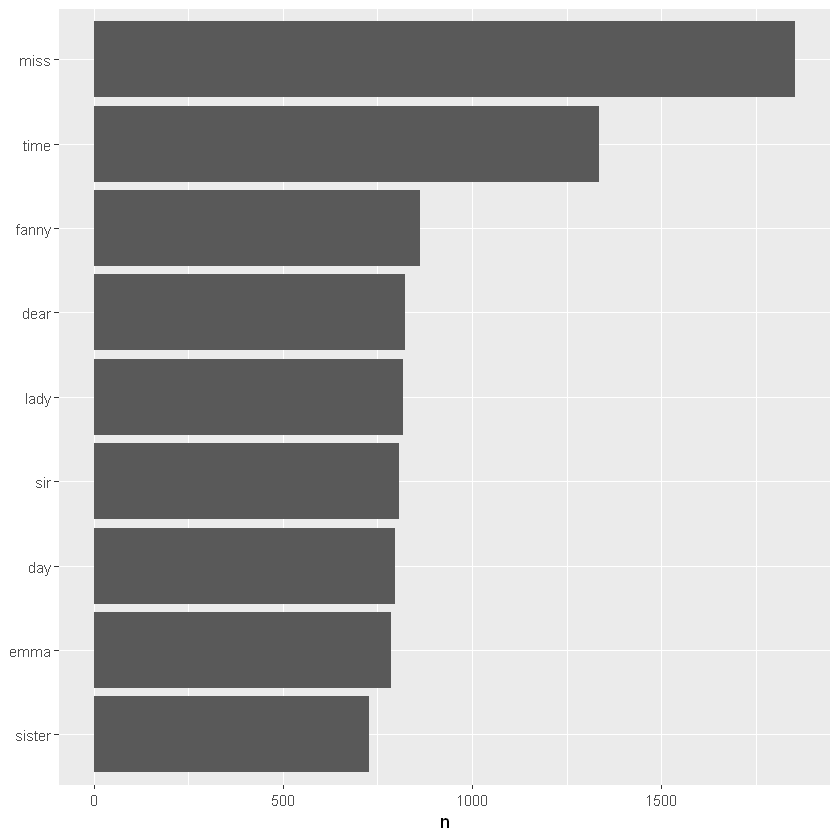

In [6]:
tidy_books %>%
  anti_join(stop_words) %>%
  count(word, sort = TRUE) %>%
  filter(n > 700) %>%
  mutate(word = reorder(word, n)) %>% # neater way to reorder
  ggplot(aes(word, n)) +
  geom_col() +
  xlab(NULL) +
  coord_flip()